# TP : Régression Linéaire Multiple - Prédiction du Profit

Ce notebook est structuré pour vous guider à travers les étapes de construction d'un modèle de prédiction de profit pour des startups.

## Objectif 1 : Préparer un jeu de donnée pour l’analyse

### Question 1.1
Importez les bibliothèques Python nécessaires (`numpy`, `matplotlib`, `pandas`) et chargez le dataset `50_Startups.csv`.

In [189]:
import numpy as np
import pandas as pd

df = pd.read_csv("./data/50_Startups.csv")


print(df.head())


   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [190]:
X = df.iloc[:,:-1].values
print(X)


Y = df.iloc[:,4].values
print(Y)



[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

### Question 1.2
Encodez les données catégorielles (colonne 'State') en utilisant `LabelEncoder` et `OneHotEncoder`. 

In [191]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


uniqueStates = df['State'].nunique()
print(uniqueStates)


3


In [ ]:
labelEnc = LabelEncoder()

# df['state_enc'] = labelEnc.fit_transform(df['State'])
# print(df)

X[:,3] = labelEnc.fit_transform(X[:,3])
print(X)


[[165349.2 136897.8 471784.1 2]
 [162597.7 151377.59 443898.53 0]
 [153441.51 101145.55 407934.54 1]
 [144372.41 118671.85 383199.62 2]
 [142107.34 91391.77 366168.42 1]
 [131876.9 99814.71 362861.36 2]
 [134615.46 147198.87 127716.82 0]
 [130298.13 145530.06 323876.68 1]
 [120542.52 148718.95 311613.29 2]
 [123334.88 108679.17 304981.62 0]
 [101913.08 110594.11 229160.95 1]
 [100671.96 91790.61 249744.55 0]
 [93863.75 127320.38 249839.44 1]
 [91992.39 135495.07 252664.93 0]
 [119943.24 156547.42 256512.92 1]
 [114523.61 122616.84 261776.23 2]
 [78013.11 121597.55 264346.06 0]
 [94657.16 145077.58 282574.31 2]
 [91749.16 114175.79 294919.57 1]
 [86419.7 153514.11 0.0 2]
 [76253.86 113867.3 298664.47 0]
 [78389.47 153773.43 299737.29 2]
 [73994.56 122782.75 303319.26 1]
 [67532.53 105751.03 304768.73 1]
 [77044.01 99281.34 140574.81 2]
 [64664.71 139553.16 137962.62 0]
 [75328.87 144135.98 134050.07 1]
 [72107.6 127864.55 353183.81 2]
 [66051.52 182645.56 118148.2 1]
 [65605.48 153032.0

In [193]:
oneHotEnc = OneHotEncoder(sparse_output=False,drop="first",dtype="int64")

X_states = oneHotEnc.fit_transform(X[:,[3]])

X = np.append(values=np.delete(X, 3, axis=1),arr=X_states, axis=1)

print(X)


[[0 1 165349.2 136897.8 471784.1]
 [0 0 162597.7 151377.59 443898.53]
 [1 0 153441.51 101145.55 407934.54]
 [0 1 144372.41 118671.85 383199.62]
 [1 0 142107.34 91391.77 366168.42]
 [0 1 131876.9 99814.71 362861.36]
 [0 0 134615.46 147198.87 127716.82]
 [1 0 130298.13 145530.06 323876.68]
 [0 1 120542.52 148718.95 311613.29]
 [0 0 123334.88 108679.17 304981.62]
 [1 0 101913.08 110594.11 229160.95]
 [0 0 100671.96 91790.61 249744.55]
 [1 0 93863.75 127320.38 249839.44]
 [0 0 91992.39 135495.07 252664.93]
 [1 0 119943.24 156547.42 256512.92]
 [0 1 114523.61 122616.84 261776.23]
 [0 0 78013.11 121597.55 264346.06]
 [0 1 94657.16 145077.58 282574.31]
 [1 0 91749.16 114175.79 294919.57]
 [0 1 86419.7 153514.11 0.0]
 [0 0 76253.86 113867.3 298664.47]
 [0 1 78389.47 153773.43 299737.29]
 [1 0 73994.56 122782.75 303319.26]
 [1 0 67532.53 105751.03 304768.73]
 [0 1 77044.01 99281.34 140574.81]
 [0 0 64664.71 139553.16 137962.62]
 [1 0 75328.87 144135.98 134050.07]
 [0 1 72107.6 127864.55 353183.

    R&D Spend  Administration  Marketing Spend  State_Florida  State_New York
0   165349.20       136897.80        471784.10              0               1
1   162597.70       151377.59        443898.53              0               0
2   153441.51       101145.55        407934.54              1               0
3   144372.41       118671.85        383199.62              0               1
4   142107.34        91391.77        366168.42              1               0
5   131876.90        99814.71        362861.36              0               1
6   134615.46       147198.87        127716.82              0               0
7   130298.13       145530.06        323876.68              1               0
8   120542.52       148718.95        311613.29              0               1
9   123334.88       108679.17        304981.62              0               0
10  101913.08       110594.11        229160.95              1               0
11  100671.96        91790.61        249744.55              0   

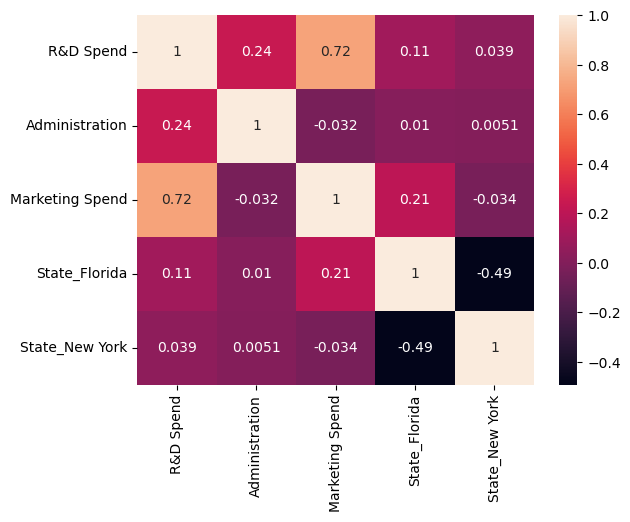

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt

statesEncoded = oneHotEnc.fit_transform(df[['State']])

feature_names = oneHotEnc.get_feature_names_out(['State'])

df_states_encoded = pd.DataFrame(
  data=statesEncoded,
  columns=feature_names,
  index=df.index
)

df = df.drop(["State","Profit"],axis=1)
df = df.join(df_states_encoded)

print(df)

sns.heatmap(df.corr(),annot=True)
plt.show()

### Question 1.3
Supprimez la première colonne du dummy variable pour éviter le 'Dummy Variable Trap'.

In [195]:

# X = X[:,1:] : this is done automatically using the parameter drop="first"

print(X)

[[0 1 165349.2 136897.8 471784.1]
 [0 0 162597.7 151377.59 443898.53]
 [1 0 153441.51 101145.55 407934.54]
 [0 1 144372.41 118671.85 383199.62]
 [1 0 142107.34 91391.77 366168.42]
 [0 1 131876.9 99814.71 362861.36]
 [0 0 134615.46 147198.87 127716.82]
 [1 0 130298.13 145530.06 323876.68]
 [0 1 120542.52 148718.95 311613.29]
 [0 0 123334.88 108679.17 304981.62]
 [1 0 101913.08 110594.11 229160.95]
 [0 0 100671.96 91790.61 249744.55]
 [1 0 93863.75 127320.38 249839.44]
 [0 0 91992.39 135495.07 252664.93]
 [1 0 119943.24 156547.42 256512.92]
 [0 1 114523.61 122616.84 261776.23]
 [0 0 78013.11 121597.55 264346.06]
 [0 1 94657.16 145077.58 282574.31]
 [1 0 91749.16 114175.79 294919.57]
 [0 1 86419.7 153514.11 0.0]
 [0 0 76253.86 113867.3 298664.47]
 [0 1 78389.47 153773.43 299737.29]
 [1 0 73994.56 122782.75 303319.26]
 [1 0 67532.53 105751.03 304768.73]
 [0 1 77044.01 99281.34 140574.81]
 [0 0 64664.71 139553.16 137962.62]
 [1 0 75328.87 144135.98 134050.07]
 [0 1 72107.6 127864.55 353183.

### Question 1.4
Fractionnez les données en un ensemble d'apprentissage (`X_train`, `y_train`) et un ensemble de test (`X_test`, `y_test`) avec un ratio de 20% pour le test.

In [196]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.2,random_state=0)


## Objectif 2 : Construire un modèle de prédiction

### Question 2.1
Ajustez le modèle de régression linéaire multiple (`LinearRegression`) aux données d'apprentissage.

In [197]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Question 2.2
Prédisez les résultats de l'ensemble de test et affichez les valeurs prédites (`y_pred`) face aux valeurs réelles (`y_test`).

========= y_test =========
[103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
  97483.56 110352.25 166187.94]

========= y_pred =========
[103015.20159797 132582.27760815 132447.73845174  71976.09851258
 178537.48221054 116161.24230164  67851.69209676  98791.73374688
 113969.43533012 167921.06569549]


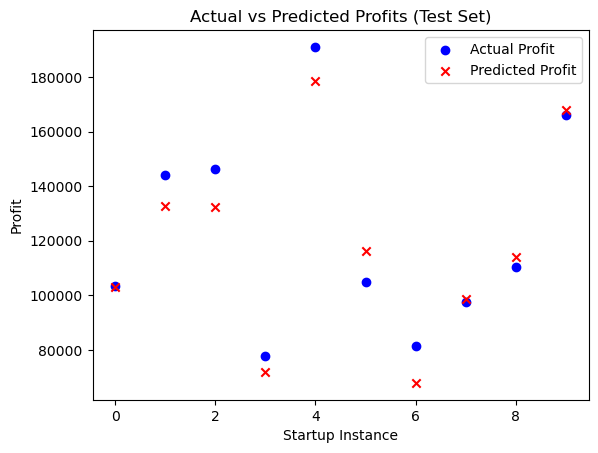

In [198]:
import matplotlib.pyplot as plt

y_pred = regressor.predict(X_test)

print("========= y_test =========")
print(y_test)
print("\n========= y_pred =========")
print(y_pred)

plt.scatter(range(len(y_test)),y_test,color="blue",label="Actual Profit")
plt.scatter(range(len(y_pred)),y_pred,color="red",marker="x",label="Predicted Profit")
plt.title('Actual vs Predicted Profits (Test Set)')
plt.xlabel('Startup Instance')
plt.ylabel('Profit')
plt.legend()
plt.show()

## Objectif 3 : Optimisation du modèle (Backward Elimination)

### Question 3.1
Ajoutez une colonne de 1 à votre matrice `X` pour prendre en compte la constante $b_0$ dans le modèle `statsmodels`.

In [199]:
X = np.append(arr=np.ones((50,1)).astype(int),values=X,axis=1)

print(X)


[[1 0 1 165349.2 136897.8 471784.1]
 [1 0 0 162597.7 151377.59 443898.53]
 [1 1 0 153441.51 101145.55 407934.54]
 [1 0 1 144372.41 118671.85 383199.62]
 [1 1 0 142107.34 91391.77 366168.42]
 [1 0 1 131876.9 99814.71 362861.36]
 [1 0 0 134615.46 147198.87 127716.82]
 [1 1 0 130298.13 145530.06 323876.68]
 [1 0 1 120542.52 148718.95 311613.29]
 [1 0 0 123334.88 108679.17 304981.62]
 [1 1 0 101913.08 110594.11 229160.95]
 [1 0 0 100671.96 91790.61 249744.55]
 [1 1 0 93863.75 127320.38 249839.44]
 [1 0 0 91992.39 135495.07 252664.93]
 [1 1 0 119943.24 156547.42 256512.92]
 [1 0 1 114523.61 122616.84 261776.23]
 [1 0 0 78013.11 121597.55 264346.06]
 [1 0 1 94657.16 145077.58 282574.31]
 [1 1 0 91749.16 114175.79 294919.57]
 [1 0 1 86419.7 153514.11 0.0]
 [1 0 0 76253.86 113867.3 298664.47]
 [1 0 1 78389.47 153773.43 299737.29]
 [1 1 0 73994.56 122782.75 303319.26]
 [1 1 0 67532.53 105751.03 304768.73]
 [1 0 1 77044.01 99281.34 140574.81]
 [1 0 0 64664.71 139553.16 137962.62]
 [1 1 0 75328.8

### Question 3.2
Réalisez l'élimination arrière (Backward Elimination) étape par étape en éliminant les variables ayant une P-value supérieure à 0.05. Affichez le résumé (`summary`) à chaque étape.

In [200]:

# The Significance Level: SL = 0.05
# If P-value < SL: The variable is significant (keep it).
# If P-value > SL: The variable is "noise" (remove it).

import statsmodels.api as sm

# statsmodels expects numeric (float) arrays. Convert any object-dtype arrays to float
X_opt = X[:, [0, 1, 2, 3, 4, 5]].astype(float)
Y_float = Y.astype(float)


regressor_OLS = sm.OLS(endog=Y_float, exog=X_opt).fit()
print(regressor_OLS.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 10 Jan 2026   Prob (F-statistic):           1.34e-27
Time:                        09:10:08   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.0

In [201]:
X_opt = X[:, [0, 3]].astype(float)
Y_float = Y.astype(float)


regressor_OLS = sm.OLS(endog=Y_float,exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sat, 10 Jan 2026   Prob (F-statistic):           3.50e-32
Time:                        09:10:08   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.0

## Objectif 4 : Prédiction finale

### Question 4.1
Utilisez le modèle optimal final pour prédire le profit d'une nouvelle entrée avec les caractéristiques suivantes : `[1, 66051.5, 118148]`.

In [202]:
regressor_OLS.predict([[1, 165349]]) 

array([190289.12303461])